In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, C=0, k=0.1, max_iter=10000, tol=1e-5):
    m, n = X.shape
    w = np.zeros(n)
    w_prev = np.ones(n)
    iter_count = 0

    while np.linalg.norm(w - w_prev) > tol and iter_count < max_iter:
        w_prev = np.copy(w)
        z = np.dot(X, w)
        predictions = sigmoid(y * z)
        gradient = np.dot(X.T, y * (1 - predictions)) / m - C * w
        w += k * gradient
        iter_count += 1

    return w

# Загрузка данных
data = pd.read_csv('data-logistic.csv', header=None)
y = data[0].values
X = data.drop(0, axis=1).values

# Обучение моделей с и без регуляризации
w_no_reg = gradient_descent(X, y, C=0, k=0.1)
w_with_reg = gradient_descent(X, y, C=10, k=0.1)

# Расчет AUC-ROC для моделей
probabilities_no_reg = sigmoid(np.dot(X, w_no_reg))
probabilities_with_reg = sigmoid(np.dot(X, w_with_reg))

auc_no_reg = roc_auc_score(y, probabilities_no_reg)
auc_with_reg = roc_auc_score(y, probabilities_with_reg)

print(f'AUC-ROC без регуляризации: {auc_no_reg:.3f}')
print(f'AUC-ROC с L2-регуляризацией: {auc_with_reg:.3f}')


AUC-ROC без регуляризации: 0.927
AUC-ROC с L2-регуляризацией: 0.936


In [2]:
def plot_decision_boundary(X, y, w, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", marker='o', s=100)
    
    x_boundary = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_boundary = (-w[0] - w[1] * x_boundary) / w[1]
    plt.plot(x_boundary, y_boundary, 'k-', label='Decision Boundary')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

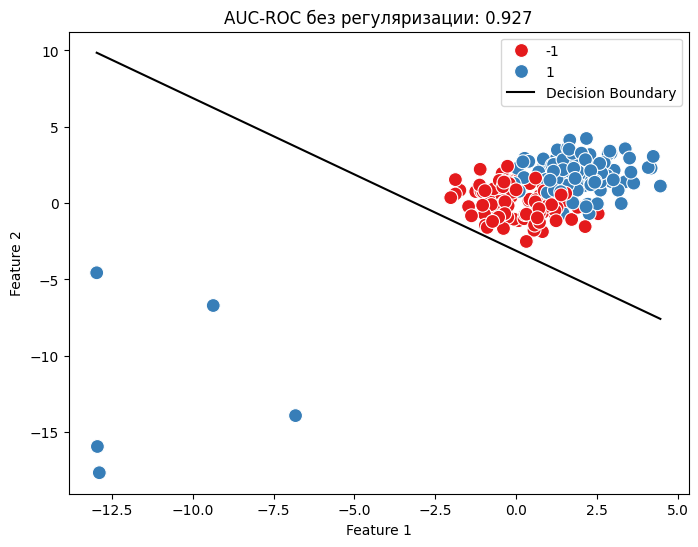

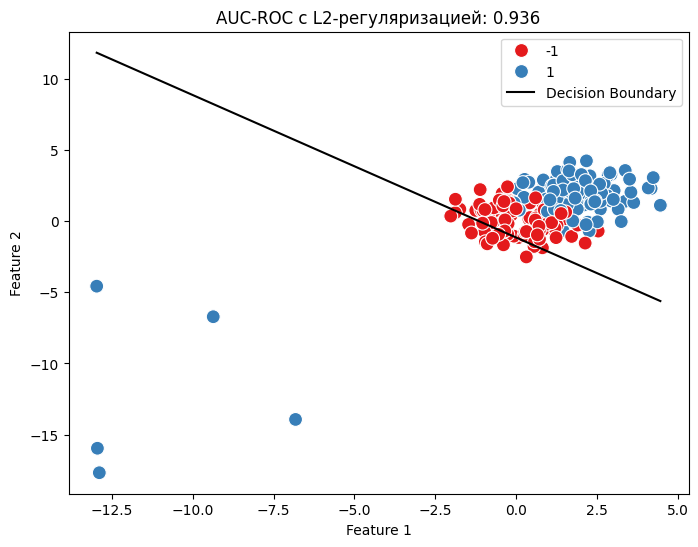

In [3]:
plot_decision_boundary(X, y, w_no_reg, f'AUC-ROC без регуляризации: {auc_no_reg:.3f}')
plot_decision_boundary(X, y, w_with_reg, f'AUC-ROC с L2-регуляризацией: {auc_with_reg:.3f}')